## Make training and testing data

In [1]:
from codes import video as v

In [3]:
# make data for training 
video = v.Video()
video.set_frame_size(600,900)
video.set_image('shin2.jpg')
video.set_rotation([0,15,30,45, -15, -30, -45]) # angles for image rotation
video.set_size([150,166,184,200]) # size variations of the image 
video.generate_frames(1000, (20,30), 20) # num_of_frames, starting position(top left coordinate), step size
video.output_frames('train',to_pickle=True)

In [2]:
# make data for testing
video = v.Video()
video.set_frame_size(600,900)
video.set_image('shin2.jpg')
video.set_rotation([0,15,30,45, -15, -30, -45])
video.set_size([150,166,184,200])
video.generate_frames(200, (50,30), 20)
video.output_frames('test',to_pickle=True)

## Model training

In [1]:
from codes import model as m
import keras
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# load data for training
x, y, input_shape = m.get_labelled_data('train_frames', 'train_boxes')

# to train a model from scratch or use a pretrained model 
#model_in_use = m.get_model(input_shape=input_shape)
model_in_use = load_model('./models/best_model_1.hdf5', custom_objects={'my_loss':m.my_loss})

# compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_in_use.compile(optimizer=optimizer, loss=m.my_loss)

In [12]:
# set configuration for training 
batch_size = 20
no_epochs = 50
validation_split = 0.2

checkpoint = ModelCheckpoint(
    "models/best_model.hdf5", monitor='val_loss', verbose=0, save_best_only=True, mode='auto', period=1
)

# start training
history = model_in_use.fit(
    x, y, epochs = no_epochs, batch_size = batch_size, verbose=0, 
    validation_split = validation_split, callbacks=[checkpoint]
)

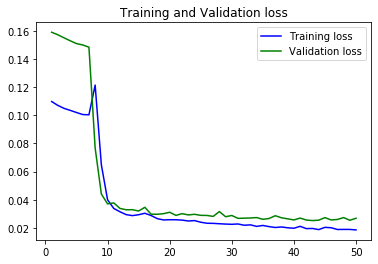

In [13]:
# visualization of training and validation loss 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

## Model testing

In [2]:
from keras.models import load_model
import pickle

In [3]:
# load data for testing
x, y, _ = m.get_labelled_data('test_frames', 'test_boxes')

# load the best model and evaluate it 
best_model = load_model('models/best_model.hdf5', custom_objects={'my_loss':m.my_loss})
best_model.evaluate(x, y, verbose=0)

0.025343782976269724

In [4]:
# make prediction and save the result
y_pred = best_model.predict(x)

with open('pickle_files/test_boxes_pred.pickle','wb') as f: 
    pickle.dump(y_pred,f)

In [2]:
# make video to check the result visually
v.make_video_from_pickle('test_frames', 'test_boxes_pred', 'test_output')